# PROBLEM 1 

## (a) 

In [290]:
import pandas as pd
import numpy as np
import csv
#from __future__ import division
import random
import math
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [291]:
#labels = pd.read_csv("spambase.names")


#read data file data into dataframe
list_column= ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','if_spam']

data = pd.read_csv("spambase.data", names = list_column)
data.head()


#data.sample(frac = 0.394)



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,if_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [292]:
X = data.iloc[:,:57]
Y = data['if_spam']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)



In [293]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

print("Ensuring the given condition:", Y_train[Y_train==1].count()/len(Y_train))
lgr = linear_model.LogisticRegression()
lgr.fit(X_train,Y_train)

y_pred = lgr.predict(X_test)
#y_pred

Ensuring the given condition: 0.39507246376811594


1

In [294]:
confusion_matrix(Y_test, y_pred)

array([[676,  25],
       [ 58, 392]], dtype=int64)

2

In [295]:
tp,fn,fp,tn = confusion_matrix(Y_test, y_pred).ravel()

print("True Positive:",tp)
print("False Positive:",fp)
print("True Negative:",tn)
print("False Negative:",fn)




True Positive: 676
False Positive: 58
True Negative: 392
False Negative: 25


3

In [296]:
Accuracy = (tp+tn)/(tp+fp+fn+tn)
print("Accuracy:", Accuracy)
print("Error:" ,1- Accuracy)

Accuracy: 0.9278887923544744
Error: 0.07211120764552559


4

In [297]:
precesion = tp/(tp+fp)
recall = tp/(tp+fn)
F1_score =  2* precesion *recall/(precesion+recall)
print("Precesion", precesion)
print("Recall", recall)
print("F1 score", F1_score)

Precesion 0.9209809264305178
Recall 0.9643366619115549
F1 score 0.9421602787456447


## (b) 

In [298]:

print("Coefficients:", lgr.coef_)

c = lgr.coef_

Coefficients: [[-0.09554938 -0.19227622  0.07566445  0.72470979  0.2856662   0.18300081
   0.87149544  0.25480228  0.15339246  0.04435209 -0.06483383 -0.10648134
  -0.00656088  0.02052661  0.28990717  0.94285368  0.36898037  0.03404817
   0.1795526   0.37422615  0.23021244  0.27742507  0.76084584  0.15786092
  -2.63201771 -1.2672251  -4.06271776  0.22180383 -0.9778588  -0.23369398
  -0.16545071  0.12874899 -0.45804797 -1.02624285 -0.90119201  0.38348274
  -0.16326097 -0.15898167 -0.37806418 -0.17588167 -1.64114644 -1.36745369
  -0.24466596 -0.78162668 -0.97335243 -1.40634505 -0.16873209 -0.66275509
  -0.35783348 -0.06881151 -0.28537876  0.27121816  1.24645131  0.95978406
  -0.33305205  1.28403891  0.42166458]]


In [299]:
coef_input=pd.DataFrame(np.append(lgr.intercept_ , lgr.coef_[0]),
                        index=np.append('intercept',data.iloc[:1,0:-1].T.index), columns=['coefficients'])

coef_input

,coefficients
intercept,-2.851422
word_freq_make,-0.095549
word_freq_address,-0.192276
word_freq_all,0.075664
word_freq_3d,0.724710
word_freq_our,0.285666
word_freq_over,0.183001
word_freq_remove,0.871495
word_freq_internet,0.254802
word_freq_order,0.153392


In [300]:
coef_sort = coef_input.sort_values('coefficients')

26th feauture is highly correlated. i.e, word_freq_george

In [301]:
coef_sort

,coefficients
word_freq_george,-4.062718
intercept,-2.851422
word_freq_hp,-2.632018
word_freq_cs,-1.641146
word_freq_edu,-1.406345
word_freq_meeting,-1.367454
word_freq_hpl,-1.267225
word_freq_415,-1.026243
word_freq_lab,-0.977859
word_freq_re,-0.973352


word_freq_george,
word_freq_hp,
word_freq_cs,
word_freq_edu,
word_freq_meeting,
word_freq_hpl,
word_freq_415,
word_freq_lab,
word_freq_re,
word_freq_85,,
word_freq_project,
word_freq_conference,
word_freq_data,
word_freq_pm,
char_freq_;
capital_run_length_average,
char_freq_[

word_freq_labs,
word_freq_address,
word_freq_direct,
word_freq_table,
word_freq_telnet,
word_freq_1999,
word_freq_parts,
word_freq_will,
word_freq_make,
char_freq_(,
word_freq_receive,
word_freq_people  are negatively correlated and rest are positively correlated


## (c) 

In [302]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,roc_auc_score, recall_score, roc_curve, precision_score
pred_df = pd.DataFrame(lgr.predict_proba(X_test))
threshold_list = [0.25,0.5,0.75,0.9]
for i in threshold_list:
    print("###########For i ={}##########".format(i))
    Y_pred = pred_df.applymap(lambda x: 1 if x>i else 0)
    conf = confusion_matrix(Y_test, Y_pred[1])
    print("Confusion Matrix:", conf)
    print("Accuracy", accuracy_score(Y_test, Y_pred[1]))
    print("Error", 1- accuracy_score(Y_test, Y_pred[1]))
    print("Precesion", precision_score(Y_test, Y_pred[1]))
    print("Recall", recall_score(Y_test, Y_pred[1]))
    print("F1 score", f1_score(Y_test, Y_pred[1]))

###########For i =0.25##########
Confusion Matrix: [[613  88]
 [ 26 424]]
Accuracy 0.9009556907037359
Error 0.09904430929626407
Precesion 0.828125
Recall 0.9422222222222222
F1 score 0.8814968814968815
###########For i =0.5##########
Confusion Matrix: [[676  25]
 [ 58 392]]
Accuracy 0.9278887923544744
Error 0.07211120764552559
Precesion 0.9400479616306955
Recall 0.8711111111111111
F1 score 0.9042675893886967
###########For i =0.75##########
Confusion Matrix: [[694   7]
 [111 339]]
Accuracy 0.89748045178106
Error 0.10251954821894005
Precesion 0.9797687861271677
Recall 0.7533333333333333
F1 score 0.8517587939698493
###########For i =0.9##########
Confusion Matrix: [[697   4]
 [193 257]]
Accuracy 0.8288444830582102
Error 0.17115551694178976
Precesion 0.9846743295019157
Recall 0.5711111111111111
F1 score 0.7229254571026724


As threshold increases, Accuracy increases and decreases after a point
precesion increasing
recall decreases
f1 score fluctuates as it depends on precesion and recall

## (d) 

In [303]:


def sigmoid(x):
    return 1/(1+ np.exp(-x))

def net_input(theta, x):
    # Computes the weighted sum of inputs
    return np.dot(x, theta)

def H(theta, x):
    return sigmoid(net_input(theta, x))


theta = np.zeros(len(X_test.columns))
#print(theta)
def GD(x,y,theta, Learning_rate, iterations):
    cost_list = []
    theta_list = []
    pred_list =[]
    
    
    for i in range(iterations):
       
        m = len(x)
        predict = sigmoid(np.dot(x, theta))
        #print(predict)
        total_cost = - ((y * np.log(H(theta,x)) + (1-y) * np.log(1- H(theta, x)))).mean()
        #print(total_cost)
        cost_list.append(total_cost)
        d_theta = (1/len(x)) * np.dot(x.T, sigmoid(net_input(theta,x))-y)
        
        theta = theta - Learning_rate * d_theta
        
        theta_list.append(theta)
        pred_list.append(predict)
        
        
        #print("##########################################################################################################")
        #print("cost {}, iteration {}".format(total_cost, i))
    print(total_cost)
    
    #print(theta1, theta0, cost)
    return predict
#GD(X_test,Y_test,theta, 0.1,1)

In [304]:
for Learning_rate in [0.01,0.1,1]:
    print("Learning Rate:", Learning_rate)
    print("#######################################")
    for iterations in [10, 50, 100]:
        print('After {} iterations:'.format(iterations))
        GD(X_test,Y_test,theta, Learning_rate,iterations)


Learning Rate: 0.01
#######################################
After 10 iterations:
0.6545815404878357
After 50 iterations:
0.5410281654060278
After 100 iterations:
0.4646355456241524
Learning Rate: 0.1
#######################################
After 10 iterations:
0.47180555287857295
After 50 iterations:
0.30769369524848067
After 100 iterations:
0.2657359811313242
Learning Rate: 1
#######################################
After 10 iterations:
0.26529992503938243
After 50 iterations:
0.21396861072354953
After 100 iterations:
0.20232597927385523


In [305]:
print("After 100 iterrations")
for Learning_rate in [0.01,0.1,0.5]:
    print("For Learning Rate",Learning_rate )
    print("Loss:")
    y_pred = GD(X_test,Y_test,theta, Learning_rate,100)
    y_pred = pd.DataFrame(y_pred)
    y_pred = y_pred.applymap(lambda x: 1 if x>i else 0)
    print("Accuracy", accuracy_score(Y_test, y_pred))
    print("F1 Score", f1_score(Y_test, y_pred))

After 100 iterrations
For Learning Rate 0.01
Loss:
0.4646355456241524
Accuracy 0.6194613379669852
F1 Score 0.05194805194805195
For Learning Rate 0.1
Loss:
0.2657359811313242
Accuracy 0.792354474370113
F1 Score 0.6459259259259259
For Learning Rate 0.5
Loss:
0.21406245963556694
Accuracy 0.845351867940921
F1 Score 0.7588075880758808


Accurary is 86%. More iterations or a higher learning rate is needed to reach package results

# PROBLEM 2

In [327]:
#Logistic Regression
lgr = linear_model.LogisticRegression()

##Train Data
lgr.fit(X_train,Y_train)
y_train_log = lgr.predict(X_train)

##Test Data
lgr.fit(X_test,Y_test)
y_test_log = lgr.predict(X_test)


#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

##Train Dta
X_lda =lda.fit_transform(X_train,Y_train)
y_train_lda = lda.predict(X_train)

##Test Data
X_lda =lda.fit_transform(X_test,Y_test)
y_test_lda = lda.predict(X_test)


#KNN
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)

##Train Data
knn1.fit(X_train,Y_train)
y_train_knn1 = knn1.predict(X_train)


##Test Data
knn1.fit(X_test,Y_test)
y_test_knn1 = knn1.predict(X_test)


#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

#Train Data
NB.fit(X_train, Y_train)
y_train_nb = NB.predict(X_train)

#Test Data
NB.fit(X_test, Y_test)
y_test_nb = NB.predict(X_test)


#Decesion Trees
from sklearn import tree
dt = tree.DecisionTreeClassifier()

#Train Data
dt.fit(X_train, Y_train)
y_train_dt = dt.predict(X_train)

#Test Data
dt.fit(X_test, Y_test)
y_test_dt = dt.predict(X_test)

## (a) 

In [328]:
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = k)
    print("For K =", k)
    ##Train Data
    knn.fit(X_train,Y_train)
    y_train_knn = knn.predict(X_train)
    print("KNN Train Accuracy", accuracy_score(Y_train, y_train_knn))
    print("KNN Train Error", 1 - accuracy_score(Y_train, y_train_knn))
    ##Test Data
    knn.fit(X_test,Y_test)
    y_test_knn = knn.predict(X_test)
    print("KNN Test Accuracy", accuracy_score(Y_test, y_test_knn))
    print("KNN Test Error", 1- accuracy_score(Y_test, y_test_knn))


For K = 1
KNN Train Accuracy 0.9997101449275362
KNN Train Error 0.00028985507246381825
KNN Test Accuracy 1.0
KNN Test Error 0.0
For K = 2
KNN Train Accuracy 0.9515942028985507
KNN Train Error 0.04840579710144932
KNN Test Accuracy 0.945264986967854
KNN Test Error 0.05473501303214601
For K = 3
KNN Train Accuracy 0.9426086956521739
KNN Train Error 0.05739130434782613
KNN Test Accuracy 0.9417897480451781
KNN Test Error 0.05821025195482188
For K = 4
KNN Train Accuracy 0.931304347826087
KNN Train Error 0.06869565217391305
KNN Test Accuracy 0.9226759339704604
KNN Test Error 0.07732406602953956
For K = 5
KNN Train Accuracy 0.9330434782608695
KNN Train Error 0.06695652173913047
KNN Test Accuracy 0.9252823631624674
KNN Test Error 0.07471763683753263
For K = 6
KNN Train Accuracy 0.9223188405797101
KNN Train Error 0.07768115942028986
KNN Test Accuracy 0.9113814074717637
KNN Test Error 0.08861859252823634
For K = 7
KNN Train Accuracy 0.923768115942029
KNN Train Error 0.07623188405797099
KNN Test Ac

## (b)

In [329]:
print("LOGISTIC REGRESSION")
print("Train Accuracy", accuracy_score(Y_train, y_train_log))
print("Test Accuracy", accuracy_score(Y_test, y_test_log))
print("Train Error", 1- accuracy_score(Y_train, y_train_log))
print("Test Error",1-  accuracy_score(Y_test, y_test_log))

print("LDA")
print("Train Accuracy", accuracy_score(Y_train, y_train_lda))
print("Test Accuracy", accuracy_score(Y_test, y_test_lda))
print("Train Error", 1- accuracy_score(Y_train, y_train_lda))
print("Test Error",1-  accuracy_score(Y_test, y_test_lda))

print("KNN")
print("Train Accuracy", accuracy_score(Y_train, y_train_knn1))
print("Test Accuracy", accuracy_score(Y_test, y_test_knn1))
print("Train Error", 1- accuracy_score(Y_train, y_train_knn1))
print("Test Error",1-  accuracy_score(Y_test, y_test_knn1))

print("Naive Bayes")
print("Train Accuracy", accuracy_score(Y_train, y_train_nb))
print("Test Accuracy", accuracy_score(Y_test, y_test_nb))
print("Train Error", 1- accuracy_score(Y_train, y_train_nb))
print("Test Error",1-  accuracy_score(Y_test, y_test_nb))

print("Decesion Tree")
print("Train Accuracy", accuracy_score(Y_train, y_train_dt))
print("Test Accuracy", accuracy_score(Y_test, y_test_dt))
print("Train Error", 1- accuracy_score(Y_train, y_train_dt))
print("Test Error",1-  accuracy_score(Y_test, y_test_dt))




LOGISTIC REGRESSION
Train Accuracy 0.9295652173913044
Test Accuracy 0.944396177237185
Train Error 0.07043478260869562
Test Error 0.05560382276281495
LDA
Train Accuracy 0.8846376811594203
Test Accuracy 0.9070373588184187
Train Error 0.11536231884057968
Test Error 0.09296264118158126
KNN
Train Accuracy 0.9997101449275362
Test Accuracy 1.0
Train Error 0.00028985507246381825
Test Error 0.0
Naive Bayes
Train Accuracy 0.8182608695652174
Test Accuracy 0.8218940052128584
Train Error 0.18173913043478263
Test Error 0.17810599478714162
Decesion Tree
Train Accuracy 0.9997101449275362
Test Accuracy 1.0
Train Error 0.00028985507246381825
Test Error 0.0


KNN and Decesion Tree has high Test Accuracy. Logistic regression is performing best. Naive bayes is worst comparetively.Knn test accuracy is perfect because of k value. Decesion Tree also produces perfect classification.

## (c)

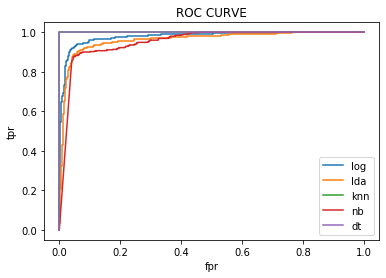

AUC FOR:
Logistic Regression: 0.9785259153590109
LDA: 0.9616072277698526
KNN: 1.0
NB: 0.9517213504517357
Decesion Tree: 1.0


In [330]:
log_score = lgr.predict_proba(X_test)
lda_score = lda.predict_proba(X_test)
knn_score = knn1.predict_proba(X_test)
nb_score = NB.predict_proba(X_test)
dt_score = dt.predict_proba(X_test)
#print(dt_score)

fpr_log, tpr_log, t = roc_curve(Y_test, log_score[:,1])
fpr_lda, tpr_lda, t = roc_curve(Y_test, lda_score[:,1])
fpr_knn, tpr_knn, t = roc_curve(Y_test, knn_score[:,1])
fpr_nb, tpr_nb, t = roc_curve(Y_test, nb_score[:,1])
fpr_dt, tpr_dt, t = roc_curve(Y_test, dt_score[:,1])

plt.plot(fpr_log,tpr_log, label = 'log')
plt.plot(fpr_lda,tpr_lda, label = 'lda')
plt.plot(fpr_knn, tpr_knn, label = 'knn')
plt.plot(fpr_nb, tpr_nb, label = 'nb')
plt.plot(fpr_dt, tpr_dt, label = 'dt')
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()
plt.title("ROC CURVE")
plt.show()


print("AUC FOR:")
print("Logistic Regression:", roc_auc_score(Y_test, log_score[:,1]))
print("LDA:", roc_auc_score(Y_test, lda_score[:,1]))
print("KNN:", roc_auc_score(Y_test, knn_score[:,1]))
print("NB:", roc_auc_score(Y_test, nb_score[:,1]))
print("Decesion Tree:", roc_auc_score(Y_test, dt_score[:,1]))


# Problem 3

In [310]:
#data = data.sample(frac = 1)
#train, test = data.iloc[:100,:], data.iloc[100:200,:]
def getData(file_path):
    spam_input = []
    ham_input = []
    labels = []
    with open(file_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            labels.append(row[57])
            if(row[57]=='1'):
                spam_input.append(row)
            else:
                ham_input.append(row)


    percent_spam = int((labels.count('1')*100)/len(labels))
    return spam_input,ham_input,percent_spam

def getTrainTestData(spam_input,ham_input,percent_spam):
    spam_sample = random.sample(spam_input,2*percent_spam)
    ham_sample = random.sample(ham_input,2*(100-percent_spam))
    train_data = spam_sample[:percent_spam]+ham_sample[:(100-percent_spam)]
    test_data = spam_sample[percent_spam:]+ham_sample[(100-percent_spam):]
    return train_data,test_data


## (a) 

In [311]:
def getEuclideanDistance(x,y):
    distance = 0
    for i in range(57):
        distance += (float(x[i])-float(y[i]))**2
    return math.sqrt(distance)

## (b) 

In [312]:
def KNN(train_data,test_data,k):
    label_set = list()
    for test_row in test_data:
        distances = list()
        for train_row in train_data:
            dist = getEuclideanDistance(test_row,train_row)
            distances.append((train_row[-1],dist))
        distances.sort(key=lambda tup: tup[1])
        neighbors = distances[:k]
        output_values = [row[0][-1] for row in neighbors]
        prediction = max(set(output_values), key=output_values.count)
        label_set.append((prediction,test_row[57]))
    return label_set

In [313]:

def getAccuracyError(labels):
    right =0
    wrong =0
    for each in labels:
        if(each[0]==each[1]):
            right+=1
        else:
            wrong+=1
    accuracy = right/(right+wrong)
    error = wrong/(right+wrong)
    return accuracy,error

In [314]:
file_path  =  "spambase.data"
spam_input,ham_input,percent_spam = getData(file_path)

train_data,test_data = getTrainTestData(spam_input,ham_input,percent_spam)
#print(test_data)
final_labels = KNN(train_data,[test_data[0]],k=3)

print("Prediction for a test point:",test_data[0],  "=", final_labels[0][0])


Prediction for a test point: ['0', '0.89', '1.14', '0', '0.12', '0', '0', '0.12', '0.25', '0.12', '0.12', '0.38', '0.12', '0', '1.14', '0', '0.12', '2.04', '2.8', '0.12', '1.27', '0', '0', '0.12', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.12', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0.165', '0', '0.371', '0.061', '0', '2.878', '84', '475', '1'] = 1


## (c) 

In [315]:
for k in range(1,11):
    final_labels = KNN(test_data,test_data,k)

    accuracy,error = getAccuracyError(final_labels)
    print("For k = ", k)
    print("Accuracy:", accuracy)
    print("Error:", error)
    

For k =  1
Accuracy: 1.0
Error: 0.0
For k =  2
Accuracy: 0.8
Error: 0.2
For k =  3
Accuracy: 0.82
Error: 0.18
For k =  4
Accuracy: 0.77
Error: 0.23
For k =  5
Accuracy: 0.79
Error: 0.21
For k =  6
Accuracy: 0.77
Error: 0.23
For k =  7
Accuracy: 0.8
Error: 0.2
For k =  8
Accuracy: 0.77
Error: 0.23
For k =  9
Accuracy: 0.74
Error: 0.26
For k =  10
Accuracy: 0.79
Error: 0.21


## (d) 

Test accuracy with k = 1 is same. With other k values it seems to differ quite a bit. Perhaps because of limited data in each fold as k increases.

## (e) 

In [316]:
import timeit


for k in range(1,10):
    start = timeit.default_timer()
    final_labels = KNN(test_data,test_data,k)
    stop = timeit.default_timer()
    print('Time for k = ',k, '\n',stop - start)  


Time for k =  1 
 1.1224675000012212
Time for k =  2 
 1.172322800000984
Time for k =  3 
 1.135630200002197
Time for k =  4 
 1.22042220000003
Time for k =  5 
 1.1021535999971093
Time for k =  6 
 1.1666210000003048
Time for k =  7 
 1.1203548999983468
Time for k =  8 
 1.1009221999993315
Time for k =  9 
 1.1389304999975138


# PROBLEM 4

## (a) 

In [317]:
k = 3
folds = np.array_split(data, k)
error = []
for i in range(k):
        train = folds.copy() 
        test = folds[i]
        testx = test.iloc[:,:57]
        testy = test["if_spam"]
        del train[i]
        train = pd.concat(train,sort=False)
        trainx = train.iloc[:,:57]
        trainy = train["if_spam"]
        #FITTING LGR
        lgr.fit(trainx,trainy)
        y_pred = lgr.predict(testx)
        validation_error = 1 - accuracy_score(testy, y_pred)
        error.append(validation_error)
print(np.mean(error))

0.24820216287594976


## (b) 

In [331]:

for k in [5, 10]:
    print("For k = ",k)
    folds = np.array_split(data, k)
    
    lgr_error_list = []
    lda_error_list = []
    for i in range(k):
        train = folds.copy() 
        test = folds[i]
        testx = test.iloc[:,:57]
        testy = test["if_spam"]
        del train[i]
        train = pd.concat(train,sort=False)
        trainx = train.iloc[:,:57]
        trainy = train["if_spam"]
        #FITTING LGR
        lgr.fit(trainx,trainy)
        y_pred = lgr.predict(testx)
        validation_error = 1 - accuracy_score(testy, y_pred)
        lgr_error_list.append(validation_error)
        #FITTING LDA
        lda.fit(trainx,trainy)
        y_pred = lda.predict(testx)
        validation_error = 1 - accuracy_score(testy, y_pred)
        lda_error_list.append(validation_error)
    print("Logistic average validation error", np.mean(lgr_error_list))
    print("LDA average validation error", np.mean(lda_error_list))


For k =  5
Logistic average validation error 0.14495633290846432
LDA average validation error 0.1838320823301704
For k =  10
Logistic average validation error 0.10670187682731305
LDA average validation error 0.1479661416580213


## (c) 

Logistic Regrssion performs better.
LDA has higher validation error than logistic regression  in both cases